In [1]:
# !pip install pandas

# Extractor
#### This code helps extract apkg (anki dorid file) which is downloaded from https://t.me/ankidroid_books telgram chanel

In [1]:
import zipfile, sqlite3, os, csv, json, re
import pandas as pd
from IPython.display import Audio
from IPython.display import Image

## Extracting media and flashcard data


In [4]:
def extract_apkg(apkg_path, extract_to="extracted_data"):
    """
    extracts apkg file into goved floder
    """
    with zipfile.ZipFile(apkg_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    return os.path.join(extract_to, "collection.anki2"), os.path.join(extract_to, "media")

In [11]:
books = {}
for n in range(1, 7):
    apkg_file = f"ESSENTIAL_BOOK_{n}.apkg"
    db_file, media_file = extract_apkg(f"data/{apkg_file}", extract_to = f"data/books/book{n}")
    books[n] = {'db_file': db_file, 'media_file': media_file}

for num, book in books.items():
    print(num, book)

1 {'db_file': 'data/books/book1/collection.anki2', 'media_file': 'data/books/book1/media'}
2 {'db_file': 'data/books/book2/collection.anki2', 'media_file': 'data/books/book2/media'}
3 {'db_file': 'data/books/book3/collection.anki2', 'media_file': 'data/books/book3/media'}
4 {'db_file': 'data/books/book4/collection.anki2', 'media_file': 'data/books/book4/media'}
5 {'db_file': 'data/books/book5/collection.anki2', 'media_file': 'data/books/book5/media'}
6 {'db_file': 'data/books/book6/collection.anki2', 'media_file': 'data/books/book6/media'}


In [14]:
def extract_media_files(media_path, output_folder="media"):
    # Load the media JSON file that maps media IDs to filenames
    with open(media_path, 'r', encoding='utf-8') as f:
        media_map = json.load(f)

    # Make output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Copy media files to the output folder
    for media_id, filename in media_map.items():
        media_file_path = os.path.join(os.path.dirname(media_path), media_id)
        if os.path.exists(media_file_path):
            output_path = os.path.join(output_folder, filename)
            os.rename(media_file_path, output_path)  # Move or copy to output
    print(f"Media files have been extracted to '{output_folder}' floder")

In [16]:
for num, book in books.items():
    path = book['media_file']
    extract_media_files(path, output_folder = f'data/media/book{num}')
    books[num]['media_floder'] = f'data/media/book{num}'


Media files have been extracted to 'data/media/book1' floder
Media files have been extracted to 'data/media/book2' floder
Media files have been extracted to 'data/media/book3' floder
Media files have been extracted to 'data/media/book4' floder
Media files have been extracted to 'data/media/book5' floder
Media files have been extracted to 'data/media/book6' floder


In [66]:
# books

In [79]:
dfs = []
for num, book in books.items():
    db_file = book['db_file']
    conn = sqlite3.connect(db_file)
    df = pd.read_sql_query("SELECT * FROM notes;", conn)
    conn.close()

    df['book'] = num
    
    if len(df) > 600:
        df = df.loc[:599,:]
    print(f'book{num} len: {len(df)}')
    dfs.append(df)


book1 len: 600
book2 len: 600
book3 len: 600
book4 len: 600
book5 len: 600
book6 len: 600


In [80]:
anki_data = pd.concat(dfs, ignore_index=True)
anki_data

,id,guid,mid,mod,usn,tags,flds,sfld,csum,flags,data,book
0,1392952448226,mIOvw+-r@B,1392933884419,1647309736,42,,afraid <h1><b>qoʻrqqan choʻchigan</b></h1><im...,afraid,3661210606,0,,1
1,1392952448227,N;bTDJsmrh,1392933884419,1647309764,42,,"agree <h1><b>rozi boʻlmoq</b></h1><img src=""a...",agree,3661210606,0,,1
2,1392952448228,iKwZD>%8T*,1392933884419,1647309792,42,,"angry <h1><b>badjahl</b></h1><img src=""angry....",angry,3661210606,0,,1
3,1392952448229,lWG14pBoTn,1392933884419,1647309817,42,,"arrive <h1><b>yetib kelmoq, kelmoq</b></h1><i...",arrive,3661210606,0,,1
4,1392952448230,JB|c<1j$m!,1392933884419,1647309846,42,,"attack <h1><b>hujum qilmoq</b></h1><img src=""...",attack,3661210606,0,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3595,1398200633650,O0F=nD7THR,1392933884419,1647870951,46,,"peck <h1><b>choʻqilamoq, choʻqilab yemoq</b><...",peck,3661210606,0,,6
3596,1398200633652,oZ^N1t9+c?,1392933884419,1647870974,46,,reservoir <h1><b>suv ombori</b></h1><img src=...,reservoir,3661210606,0,,6
3597,1398200633653,ud8~B;9wN&,1392933884419,1647870999,46,,"streak <h1><b>alohida qism</b></h1><img src=""...",streak,3661210606,0,,6
3598,1405882898684,y=hfh2vFI6,1397079927901,1647871077,46,,"pebble <h1><b>tosh, tekis tosh</b></h1><img s...",pebble,3661210606,0,,6


In [81]:
anki_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3600 non-null   int64 
 1   guid    3600 non-null   object
 2   mid     3600 non-null   int64 
 3   mod     3600 non-null   int64 
 4   usn     3600 non-null   int64 
 5   tags    3600 non-null   object
 6   flds    3600 non-null   object
 7   sfld    3600 non-null   object
 8   csum    3600 non-null   int64 
 9   flags   3600 non-null   int64 
 10  data    3600 non-null   object
 11  book    3600 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 337.6+ KB


## Extrac new data

In [82]:
def extract_sounds(fld_content : str) -> list[str]:
    resolt = []
    for part in fld_content.split('\x1f'):
        match = re.search(r'sound:.*.mp3', part)
        if match:
            resolt.append(match.group().replace('sound:', ''))
    
    return resolt

In [83]:
example_fld_content = "\x1fafraid\x1f<h1><b>qoʻrqqan choʻchigan</b></h1><img src=\"afraid.jpg\" /><br>\x1f[sound:afraid_1392933884419.mp3]\x1f[sound:afraid_meaning.mp3]\x1f[sound:afraid_example.mp3]"

def extract_fld(fld_content : str):
    match = re.search(r'<b>.*</b>', fld_content)
    if match:
        translation = match.group()
        translation = translation.replace('<b>', '').replace('</b>', '')
    else:
        translation = None

    match = re.search(r'src=".*"', fld_content)
    if match:
        image = match.group()
        image = image.replace('src=', '').replace('"', '') 
    else:
        image = None

    
    sounds = extract_sounds(fld_content)
    if len(sounds) == 3:
        sound1, sound2, sound3 = sounds[0], sounds[1], sounds[2]
    else:
        sound1, sound2, sound3 = None, None, None

    return {'translation' : translation, 'image' : image, 'sound1' : sound1, 'sound2' : sound2, 'sound3' : sound3}

extract_fld(example_fld_content)

{'translation': 'qoʻrqqan choʻchigan',
 'image': 'afraid.jpg',
 'sound1': 'afraid_1392933884419.mp3',
 'sound2': 'afraid_meaning.mp3',
 'sound3': 'afraid_example.mp3'}

In [84]:
Audio('data/media/book1/afraid_example.mp3')

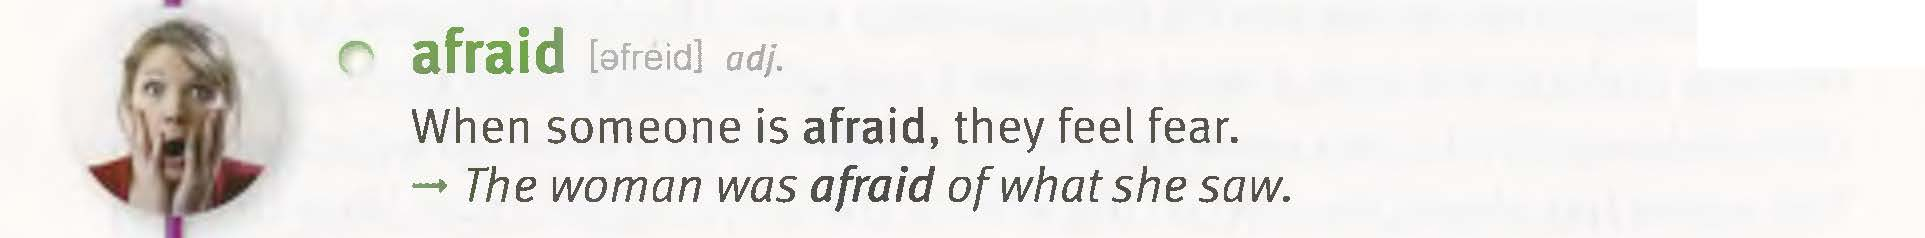

In [85]:
Image('data/media/book1/afraid.jpg')

In [95]:
dict_data = {'book': list(anki_data.loc[:, 'book']), 
             'word' : list(anki_data.loc[:, 'sfld']), 
             'translation' : [], 
             'image' : [], 
             'sound1' : [], 
             'sound2' : [], 
             'sound3' : []}

for fld in anki_data.loc[:, 'flds']:
    fld_data = extract_fld(fld)
    dict_data['translation'].append(fld_data['translation'])
    dict_data['image'].append(fld_data['image'])
    
    dict_data['sound1'].append(fld_data['sound1'])
    dict_data['sound2'].append(fld_data['sound2'])
    dict_data['sound3'].append(fld_data['sound3'])

data = pd.DataFrame(dict_data)
data

,book,word,translation,image,sound1,sound2,sound3
0,1,afraid,qoʻrqqan choʻchigan,afraid.jpg,afraid_1392933884419.mp3,afraid_meaning.mp3,afraid_example.mp3
1,1,agree,rozi boʻlmoq,agree.jpg,agree_1392933884419.mp3,agree_meaning.mp3,agree_example.mp3
2,1,angry,badjahl,angry.jpg,angry_1392933884419.mp3,angry_meaning.mp3,angry_example.mp3
3,1,arrive,"yetib kelmoq, kelmoq",arrive.jpg,arrive_1392933884419.mp3,arrive_meaning.mp3,arrive_example.mp3
4,1,attack,hujum qilmoq,attack.jpg,attack_1392933884419.mp3,attack_meaning.mp3,attack_example.mp3
...,...,...,...,...,...,...,...
3595,6,peck,"choʻqilamoq, choʻqilab yemoq",peck.jpg,peck.mp3,peck_meaning.mp3,peck_example.mp3
3596,6,reservoir,suv ombori,reservoir.jpg,reservoir.mp3,reservoir_meaning.mp3,reservoir_example.mp3
3597,6,streak,alohida qism,streak.jpg,streak.mp3,streak_meaning.mp3,streak_example.mp3
3598,6,pebble,"tosh, tekis tosh",pebble.jpg,pebble.mp3,pebble_meaning.mp3,pebble_example.mp3


## checking dublicat rows

In [96]:
len(data['word'].unique())

3590

In [99]:
data[data.duplicated(subset=['word'], keep=False)]

,book,word,translation,image,sound1,sound2,sound3
34,1,scare,"qoʻrqitmoq, daxshatga solmoq",scare.jpg,scare_1392933884419.mp3,scare_meaning.mp3,scare_example.mp3
477,1,task,"topshiriq, vazifa",task.jpg,task_1392933884419.mp3,task_meaning.mp3,task_example.mp3
1118,2,task,"vazifa, ish",task2.jpg,task2.mp3,task2_meaning.mp3,task2_example.mp3
1154,2,sort,"tur, nav",sort.jpg,sort_1392933884419.mp3,sort_meaning.mp3,sort_example.mp3
1190,2,found,asos solmoq,found.jpg,found_1392933884419.mp3,found_meaning.mp3,found_example.mp3
1293,3,scare,qoʻrqitmoq,scare3.jpg,scare3.mp3,scare3_meaning.mp3,scare3_example.mp3
1426,3,deliberate,uyushtirilgan,deliberate.jpg,deliberate_1392933884419.mp3,deliberate_meaning.mp3,deliberate_example.mp3
1733,3,rumor,mish-mish,rumor.jpg,rumor_1392933884419.mp3,rumor_meaning.mp3,rumor_example.mp3
1817,4,texture,tekstura,texture.jpg,texture.mp3,texture_meaning.mp3,texture_example.mp3
1974,4,rumor,mish-mish,rumor.jpg,rumor.mp3,rumor_meaning.mp3,rumor_example.mp3


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   book         3600 non-null   int64 
 1   word         3600 non-null   object
 2   translation  3595 non-null   object
 3   image        3600 non-null   object
 4   sound1       3600 non-null   object
 5   sound2       3600 non-null   object
 6   sound3       3600 non-null   object
dtypes: int64(1), object(6)
memory usage: 197.0+ KB


## Checking emty translations

In [103]:
indexs = data.loc[:,'translation'].isna()
data.loc[indexs, :]

,book,word,translation,image,sound1,sound2,sound3
104,1,dead,None,dead.jpg,dead_1392933884419.mp3,dead_meaning.mp3,dead_example.mp3
237,1,stair,None,stair.jpg,stair_1392933884419.mp3,stair_meaning.mp3,stair_example.mp3
256,1,sight,None,sight.jpg,sight_1392933884419.mp3,sight_meaning.mp3,sight_example.mp3
1445,3,enforce,None,enforce.jpg,enforce.mp3,enforce_meaning.mp3,enforce_example.mp3
1932,4,offence,None,offence.jpg,offence.mp3,offence_meaning.mp3,offence_example.mp3


In [104]:
for a in anki_data.loc[anki_data.loc[:, 'sfld'] == 'sight', 'flds']:
    pass
a

'<div><br /></div><div>insight &nbsp;&lt;&lt; بینش ، بصیرت</div>\x1fsight\x1f<img src="sight.jpg" />\x1f[sound:sight_1392933884419.mp3]\x1f[sound:sight_meaning.mp3]\x1f[sound:sight_example.mp3]'

In [78]:
data.loc[104, :]

word                             dead
translation                      None
image                        dead.jpg
sound1         dead_1392933884419.mp3
sound2               dead_meaning.mp3
sound3               dead_example.mp3
Name: 104, dtype: object

In [105]:
data.loc[104, 'translation'] = "o'lgan" # dead
data.loc[237, 'translation'] = "zina" # stair
data.loc[256, 'translation'] = "joy, makon" # sight
data.loc[1445, 'translation'] = "majburlash" # enforce
data.loc[1932, 'translation'] = "jinoyat" # offence

In [106]:
indexs = data.loc[:,'translation'].isna()
data.loc[indexs, :]

,book,word,translation,image,sound1,sound2,sound3


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   book         3600 non-null   int64 
 1   word         3600 non-null   object
 2   translation  3600 non-null   object
 3   image        3600 non-null   object
 4   sound1       3600 non-null   object
 5   sound2       3600 non-null   object
 6   sound3       3600 non-null   object
dtypes: int64(1), object(6)
memory usage: 197.0+ KB


## Extract words meaning and examples from image

In [30]:
# ! sudo apt install tesseract-ocr
# ! pip install pytesseract pillow
# !pip install google-generativeai

In [172]:
import pytesseract
from PIL import Image as PImage
from pathlib import Path
from time import sleep

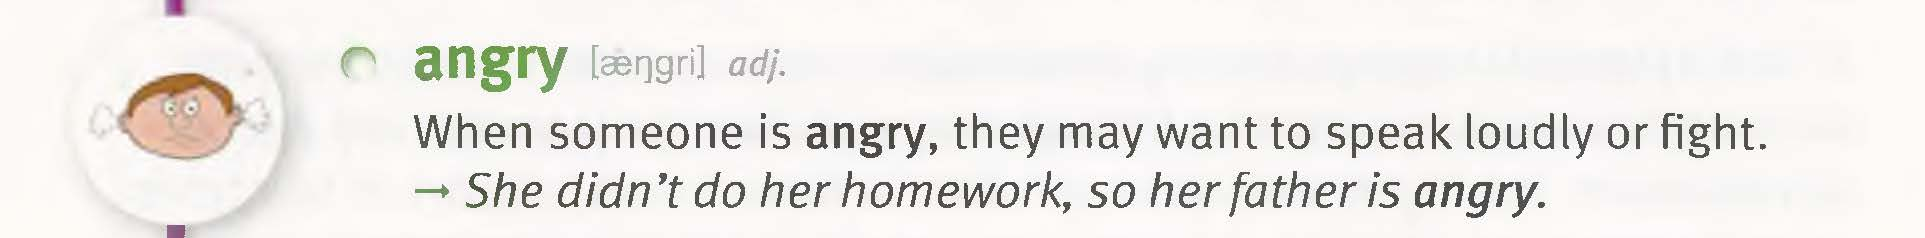

In [109]:
Image('data/media/book1/angry.jpg')

#### checking files exisiting

In [126]:
def check_path(path) -> bool:
    return Path(path).is_file() == False

books = [book for book in data.loc[:,'book']]
paths = [image_path for image_path in data.loc[:,'image']]
indexs = []

for index, path in enumerate(paths):
    book_index = books[index]
    resolt = check_path(f'data/media/book{book_index}/{path}')
    indexs.append(resolt)

In [128]:
data.loc[indexs, :]

,book,word,translation,image,sound1,sound2,sound3
528,1,false,"bitti, xato",false.jpg,false.mp3,false_meaning.mp3,false_example.mp3
1118,2,task,"vazifa, ish",task2.jpg,task2.mp3,task2_meaning.mp3,task2_example.mp3
3577,6,vice versa,yoki aksincha,vice versa.jpg,vice versa.mp3,vice versa_meaning.mp3,vice versa_example.mp3


### After added images

In [133]:
books = [book for book in data.loc[:,'book']]
paths = [image_path for image_path in data.loc[:,'image']]
indexs = []

for index, path in enumerate(paths):
    book_index = books[index]
    resolt = check_path(f'data/media/book{book_index}/{path}')
    indexs.append(resolt)

data.loc[indexs, :] # all images we have now :)

,book,word,translation,image,sound1,sound2,sound3


## Extrac text from image usign GeminAI and Teseract

In [135]:
def image_to_text(image_path : str) -> str:
    try:
        image = PImage.open(image_path)
        # Perform OCR using PyTesseract
        return pytesseract.image_to_string(image)
    except Exception as e:
        print("image_to_text", e)

image_to_text('data/media/book1/angry.jpg')

'@ angry lengril adj.\nED) When someone is angry, they may want to speak loudly or fight.\n— She didn’t do her homework, so her father is angry.\n\x0c'

In [144]:
# data.loc[528, :]
type(list(books_list))

list

In [145]:
images_data = []
n = 0
books_list = [book for book in data.loc[:, 'book']]
for index, image in enumerate(data.loc[:, 'image']):
    n+=1
    book_index = books_list[index]
    print(f"{n} data/media/book{book_index}/{image}", "  "*10, end='\r')
    text = image_to_text(f"data/media/book{book_index}/{image}")
    images_data.append(text)


In [146]:
data['image_text'] = pd.Series(images_data)
data

,book,word,translation,image,sound1,sound2,sound3,image_text
0,1,afraid,qoʻrqqan choʻchigan,afraid.jpg,afraid_1392933884419.mp3,afraid_meaning.mp3,afraid_example.mp3,© afraid lefreidl aaj.\nWhen someone is afraid...
1,1,agree,rozi boʻlmoq,agree.jpg,agree_1392933884419.mp3,agree_meaning.mp3,agree_example.mp3,© agree lagri:] v.\nTo agree is to say “yes” o...
2,1,angry,badjahl,angry.jpg,angry_1392933884419.mp3,angry_meaning.mp3,angry_example.mp3,@ angry lengril adj.\nED) When someone is angr...
3,1,arrive,"yetib kelmoq, kelmoq",arrive.jpg,arrive_1392933884419.mp3,arrive_meaning.mp3,arrive_example.mp3,a\n~ © arrive foraiv v.\n\nsi To arrive is to ...
4,1,attack,hujum qilmoq,attack.jpg,attack_1392933884419.mp3,attack_meaning.mp3,attack_example.mp3,© attack [er\n\nTo attack is to try to fight o...
...,...,...,...,...,...,...,...,...
3595,6,peck,"choʻqilamoq, choʻqilab yemoq",peck.jpg,peck.mp3,peck_meaning.mp3,peck_example.mp3,"peck (pekl v.\nWhen a bird pecks, it bites or ..."
3596,6,reservoir,suv ombori,reservoir.jpg,reservoir.mp3,reservoir_meaning.mp3,reservoir_example.mp3,reservoir [rézsrwwarl 1.\n\nAreservoir is a pl...
3597,6,streak,alohida qism,streak.jpg,streak.mp3,streak_meaning.mp3,streak_example.mp3,"streak [str:k] n.\nA streak is a long, thin ma..."
3598,6,pebble,"tosh, tekis tosh",pebble.jpg,pebble.mp3,pebble_meaning.mp3,pebble_example.mp3,"pebble [pébai} n.\n\n2g Apebble is a small, ro..."


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   book         3600 non-null   int64 
 1   word         3600 non-null   object
 2   translation  3600 non-null   object
 3   image        3600 non-null   object
 4   sound1       3600 non-null   object
 5   sound2       3600 non-null   object
 6   sound3       3600 non-null   object
 7   image_text   3600 non-null   object
dtypes: int64(1), object(7)
memory usage: 225.1+ KB


### Set units to data

In [184]:
index_data = []
unit = 0
for n in range(0, 3_600, 20):
    unit += 1
    for i in range(n, n+20):
        index_data.append(unit)
    
    if unit == 30:
        unit = 0
    
    # print([i for i in range(n, n+20)])

In [185]:
data['unit'] = pd.Series(index_data)

In [4]:
data

,book,word,translation,image,sound1,sound2,sound3,image_text,unit
0,1,afraid,qoʻrqqan choʻchigan,afraid.jpg,afraid_1392933884419.mp3,afraid_meaning.mp3,afraid_example.mp3,© afraid lefreidl aaj.\nWhen someone is afraid...,1
1,1,agree,rozi boʻlmoq,agree.jpg,agree_1392933884419.mp3,agree_meaning.mp3,agree_example.mp3,© agree lagri:] v.\nTo agree is to say “yes” o...,1
2,1,angry,badjahl,angry.jpg,angry_1392933884419.mp3,angry_meaning.mp3,angry_example.mp3,@ angry lengril adj.\nED) When someone is angr...,1
3,1,arrive,"yetib kelmoq, kelmoq",arrive.jpg,arrive_1392933884419.mp3,arrive_meaning.mp3,arrive_example.mp3,a\n~ © arrive foraiv v.\n\nsi To arrive is to ...,1
4,1,attack,hujum qilmoq,attack.jpg,attack_1392933884419.mp3,attack_meaning.mp3,attack_example.mp3,© attack [er\n\nTo attack is to try to fight o...,1
...,...,...,...,...,...,...,...,...,...
3595,6,peck,"choʻqilamoq, choʻqilab yemoq",peck.jpg,peck.mp3,peck_meaning.mp3,peck_example.mp3,"peck (pekl v.\nWhen a bird pecks, it bites or ...",30
3596,6,reservoir,suv ombori,reservoir.jpg,reservoir.mp3,reservoir_meaning.mp3,reservoir_example.mp3,reservoir [rézsrwwarl 1.\n\nAreservoir is a pl...,30
3597,6,streak,alohida qism,streak.jpg,streak.mp3,streak_meaning.mp3,streak_example.mp3,"streak [str:k] n.\nA streak is a long, thin ma...",30
3598,6,pebble,"tosh, tekis tosh",pebble.jpg,pebble.mp3,pebble_meaning.mp3,pebble_example.mp3,"pebble [pébai} n.\n\n2g Apebble is a small, ro...",30


In [234]:
#saving temorary
# data.to_csv('row_data.csv', index_label=False)
data = pd.read_csv('row_data.csv')

## Extract meaing, exampl and type using GeminAI

In [235]:
data['mean'] = None
data['example'] = None
data['type'] = None
data

,book,word,translation,image,sound1,sound2,sound3,image_text,unit,mean,example,type
0,1,afraid,qoʻrqqan choʻchigan,afraid.jpg,afraid_1392933884419.mp3,afraid_meaning.mp3,afraid_example.mp3,© afraid lefreidl aaj.\nWhen someone is afraid...,1,None,None,None
1,1,agree,rozi boʻlmoq,agree.jpg,agree_1392933884419.mp3,agree_meaning.mp3,agree_example.mp3,© agree lagri:] v.\nTo agree is to say “yes” o...,1,None,None,None
2,1,angry,badjahl,angry.jpg,angry_1392933884419.mp3,angry_meaning.mp3,angry_example.mp3,@ angry lengril adj.\nED) When someone is angr...,1,None,None,None
3,1,arrive,"yetib kelmoq, kelmoq",arrive.jpg,arrive_1392933884419.mp3,arrive_meaning.mp3,arrive_example.mp3,a\n~ © arrive foraiv v.\n\nsi To arrive is to ...,1,None,None,None
4,1,attack,hujum qilmoq,attack.jpg,attack_1392933884419.mp3,attack_meaning.mp3,attack_example.mp3,© attack [er\n\nTo attack is to try to fight o...,1,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
3595,6,peck,"choʻqilamoq, choʻqilab yemoq",peck.jpg,peck.mp3,peck_meaning.mp3,peck_example.mp3,"peck (pekl v.\nWhen a bird pecks, it bites or ...",30,None,None,None
3596,6,reservoir,suv ombori,reservoir.jpg,reservoir.mp3,reservoir_meaning.mp3,reservoir_example.mp3,reservoir [rézsrwwarl 1.\n\nAreservoir is a pl...,30,None,None,None
3597,6,streak,alohida qism,streak.jpg,streak.mp3,streak_meaning.mp3,streak_example.mp3,"streak [str:k] n.\nA streak is a long, thin ma...",30,None,None,None
3598,6,pebble,"tosh, tekis tosh",pebble.jpg,pebble.mp3,pebble_meaning.mp3,pebble_example.mp3,"pebble [pébai} n.\n\n2g Apebble is a small, ro...",30,None,None,None


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3600 entries, 0 to 3599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   book         3600 non-null   int64 
 1   word         3600 non-null   object
 2   translation  3600 non-null   object
 3   image        3600 non-null   object
 4   sound1       3600 non-null   object
 5   sound2       3600 non-null   object
 6   sound3       3600 non-null   object
 7   image_text   3600 non-null   object
 8   unit         3600 non-null   int64 
 9   mean         0 non-null      object
 10  example      0 non-null      object
 11  type         0 non-null      object
dtypes: int64(2), object(10)
memory usage: 365.6+ KB


In [66]:

def get_emty_unit(data : pd.DataFrame) -> pd.DataFrame:
    emty_data = data[data['mean'].isna()]
    if not emty_data.empty:
        firs_row = emty_data.iloc[0]      
        return emty_data[(emty_data['book'] == firs_row['book']) & (emty_data['unit'] == firs_row['unit'])]


unit = get_emty_unit(data.loc[600:, :])

def update_units(unit : pd.DataFrame, data : pd.DataFrame) -> pd.DataFrame:
    for index in unit.index:
        data.loc[index, :] = unit.loc[index, :]

    return data

# update_units(unit, data)

In [224]:
data.loc[0,'image_text']

'© afraid lefreidl aaj.\nWhen someone is afraid, they feel fear.\n~ The woman was afraid of what she saw.\n\n \n\x0c'

In [77]:
import google.generativeai as genai
from tokens import GEMINAI_TOKEN

genai.configure(api_key=GEMINAI_TOKEN)
model = genai.GenerativeModel("gemini-1.5-flash")

def genai_chat(message : str) -> str:
    response = model.generate_content(message)
    return response.text

# genai_chat("Hi")

In [236]:
def extract_unit_data(unit: pd.DataFrame) -> str:
    # Create a dictionary to hold the extracted data
    unit_dict = {}
    for index in unit.index:
        unit_dict[index] = unit.loc[index, 'image_text']

    # Example extracted data for the message
    exam = "{1: '© afraid lefreidl aaj.\nWhen someone is afraid, they feel fear.\n~ The woman was afraid of what she saw.\n\n \n\x0c'}"
    
    # Create the message for the AI model
    message = f"""I have extracted text from an image that includes word types (e.g., adj, v, n), meanings, and example sentences. 
Please clean up unnecessary words, correct any grammar mistakes, and format the information as JSON.

Here’s how I need the response:
- **JSON only**: Return only JSON without any additional text or commentary.
- **Structure**: Each item should be a dictionary with the keys "meaning", "example", and "type" using each provided dictionary key as the JSON key.
- **Example Extracted Data**: {exam}
- **Example Answer Format**: 
{{"1": {{"meaning": "When someone is afraid, they feel fear.", "example": "The woman was afraid of what she saw.", "type": "adj/v/n/etc."}}, "2": {{"meaning": "meaning here", "example": "example here", "type": "adj/v/n/etc."}}}}

**Extracted Data**:
{unit_dict}"""

    # Print the message for debugging
    # print(message)

    # Return the generated message to the AI model
    return genai_chat(message)

# Call the function with your DataFrame
# text = extract_unit_data(unit)


In [236]:
def extract_unit_data(unit: pd.DataFrame) -> str:
    # Create a dictionary to hold the extracted data
    unit_dict = {}
    for index in unit.index:
        unit_dict[index] = unit.loc[index, 'image_text']

    # Example extracted data for the message
    exam = "{1: '© afraid lefreidl aaj.\nWhen someone is afraid, they feel fear.\n~ The woman was afraid of what she saw.\n\n \n\x0c'}"
    
    # Create the message for the AI model
    message = f"""I have extracted text from an image that includes word types (e.g., adj, v, n), meanings, and example sentences. 
Please clean up unnecessary words, correct any grammar mistakes, and format the information as JSON.

Here’s how I need the response:
- **JSON only**: Return only JSON without any additional text or commentary.
- **Structure**: Each item should be a dictionary with the keys "meaning", "example", and "type" using each provided dictionary key as the JSON key.
- **Example Extracted Data**: {exam}
- **Example Answer Format**: 
{{"1": {{"meaning": "When someone is afraid, they feel fear.", "example": "The woman was afraid of what she saw.", "type": "adj/v/n/etc."}}, "2": {{"meaning": "meaning here", "example": "example here", "type": "adj/v/n/etc."}}}}

**Extracted Data**:
{unit_dict}"""

    # Print the message for debugging
    # print(message)

    # Return the generated message to the AI model
    return genai_chat(message)

# Call the function with your DataFrame
# text = extract_unit_data(unit)


In [241]:
def extract_unit_data(unit: pd.DataFrame) -> str:
    # Create a dictionary to hold the extracted data
    unit_dict = {}
    for index in unit.index:
        unit_dict[index] = unit.loc[index, 'image_text']

    # Example extracted data for the message
    exam = "{1: '© afraid lefreidl aaj.\nWhen someone is afraid, they feel fear.\n~ The woman was afraid of what she saw.\n\n \n\x0c'}"
    
    # Create the message for the AI model
    message = f"""I have extracted text from an image that includes word types (e.g., adj, v, n), meanings, and example sentences. 
Please clean up unnecessary words, correct any grammar mistakes, and format the information as JSON.

Here’s how I need the response:
- **JSON only**: Return only JSON without any additional text or commentary.
- **Structure**: Each item should be a dictionary with the keys "meaning", "example", and "type" using each provided dictionary key as the JSON key.
- **Example Extracted Data**: {exam}
- **Example Answer Format**: 
{{"1": {{"meaning": "When someone is afraid, they feel fear.", "example": "The woman was afraid of what she saw.", "type": "adj/v/n/etc."}}, "2": {{"meaning": "meaning here", "example": "example here", "type": "adj/v/n/etc."}}}}

**Extracted Data**:
{unit_dict}"""

    # Print the message for debugging
    # print(message)

    # Return the generated message to the AI model
    return genai_chat(message)

# Call the function with your DataFrame
text = extract_unit_data(unit)


In [242]:
text

'```json\n{}\n```'

In [243]:
unit

,book,word,translation,image,sound1,sound2,sound3,image_text,unit,mean,example,type
1639,3,tempt,undamoq,tempt.jpg,tempt.mp3,tempt_meaning.mp3,tempt_example.mp3,\n,22,None,None,None


In [257]:
# data.at[1639, 'mean'] = 'To tempt people is offer them something they want but shoudn\'t have.'
# data.at[1639, 'example'] =  "I wasn't hungry, but she temted me with a piece of my favorite cake."
# data.at[1639, 'type'] = 'v'

In [255]:
def parse_respons(text : str) -> dict:
    cleaned_str = text.strip("'```json\n").strip("\n```'")

    # Convert the cleaned JSON string to a dictionary
    return json.loads(cleaned_str)

dict_respons = parse_respons(text)
dict_respons

{}

In [164]:
for index, doctd in dict_respons.items():
    index = int(index)
    data.at[index, 'mean'] = doctd.get('meaning')
    data.at[index, 'example'] = doctd.get('example')
    data.at[index, 'type'] = doctd.get('type')


In [135]:
data[index, 'mean']

0      To spill is to have something fall out of its ...
1      To spill is to have something fall out of its ...
2      To spill is to have something fall out of its ...
3      To spill is to have something fall out of its ...
4      To spill is to have something fall out of its ...
                             ...                        
615                                                  NaN
616                                                  NaN
617                                                  NaN
618                                                  NaN
619                                                  NaN
Name: (619, mean), Length: 3620, dtype: object

In [166]:
data.loc[600:620, :]

,book,word,translation,image,sound1,sound2,sound3,image_text,unit,mean,example,type
600,2,anxious,"xavotirlangan, tashvishlangan",anxious.jpg,anxious_1392933884419.mp3,anxious_meaning.mp3,anxious_example.mp3,"© anxious [x\n\nWhen a person is anxious, they...",1,"When a person is anxious, they worry that some...",She was anxious about not making her appointme...,adj
601,2,awful,juda yomon,awful.jpg,awful_1392933884419.mp3,awful_meaning.mp3,awful_example.mp3,"© awful fs:\n\nWhen something is awful, it is ...",1,"When something is awful, it is very bad.",Her performance last night was awful.,adj
602,2,consist,iborat boʻlmoq,consist.jpg,consist_1392933884419.mp3,consist_meaning.mp3,consist_example.mp3,2 © consist tkonsist v.\n=p To consist of is t...,1,To consist of is to be made of parts or things.,"Today's choices for lunch consisted of pizza, ...",v
603,2,desire,"xoxlamoq, istamoq",desire.jpg,desire_1392933884419.mp3,desire_meaning.mp3,desire_example.mp3,© desire taizaiod v.\nTo desire is to want som...,1,To desire is to want something.,My sister desires a big house and lots of money.,v
604,2,eager,"chanqoq, sabrsiz",eager.jpg,eager_1392933884419.mp3,eager_meaning.mp3,eager_example.mp3,© eager li:ger) adj.\nWhen a person is eager a...,1,"When a person is eager about something, they a...",The man was eager to talk about the good news.,adj
605,2,household,oila aʼzolari,household.jpg,household_1392933884419.mp3,household_meaning.mp3,household_example.mp3,© household thaushouia) o.\n\nSt A household i...,1,A household is all the people who live in one ...,"Our household is made up of my father, my moth...",n
606,2,intent,"niyat, maqsad",intent.jpg,intent.mp3,intent_meaning.mp3,intent_example.mp3,© intent (iment o.\n\nAn intent is a plan to d...,1,An intent is a plan to do something.,Her intent is to visit Italy next summer.,n
607,2,landscape,"landshaft, manzara",landscape.jpg,landscape_1392933884419.mp3,landscape_meaning.mp3,landscape_example.mp3,© landscape lendskeip) n.\nA landscape is how ...,1,A landscape is how an area of land looks.,The landscape of the country is very green.,n
608,2,lift,koʻtarmoq,lift.jpg,lift_1392933884419.mp3,lift_meaning.mp3,lift_example.mp3,Qo lift un.\nTg To lift something is to move i...,1,To lift something is to move it higher.,The man tried to lift the box.,v
609,2,load,yuklamoq,load.jpg,load_1392933884419.mp3,load_meaning.mp3,load_example.mp3,© load tou} «.\na To load is to put objects in...,1,To load is to put objects into something.,The man loaded the boxes into a truck.,v


In [238]:
def wait_for(sec : int = 60):
    for n in range(sec, 0, -1):
        print(f"calls reached up to 12 calls, time left for starting: {n} sec  ", end='\r')
        sleep(1)
    print("Starting ...", " " * 30, end='\r')

In [258]:
calls = 0

while True:
    unit = get_emty_unit(data)

    if unit is not None and not unit.empty:
        unit_num = int(unit.iloc[0, 8])
        book = int(unit.iloc[0, 0])
        print(f"book: {book}, unit: {unit_num} extracting ...", " "*30, end='\r')

        try:
            geminai_answer = extract_unit_data(unit)
            calls += 1
        except Exception as e:
            print("calls:", calls)
            print("extract_unit_data", e)
            break
 
        try:
            dict_respons = parse_respons(geminai_answer)
        except Exception as e:
            print("parse_respons", e)
        print(dict_respons.keys())
        for index, doctd in dict_respons.items():
            index = int(index)
            data.at[index, 'mean'] = doctd.get('meaning')
            data.at[index, 'example'] = doctd.get('example')
            data.at[index, 'type'] = doctd.get('type')

        if calls == 12:
            calls = 0
            wait_for()
            
    else:
        print("All unit data has already been extracted")
        break


dict_keys(['1640', '1641', '1642', '1643', '1644', '1645', '1646', '1647', '1648', '1649', '1650', '1651', '1652', '1653', '1654', '1655', '1656', '1657', '1658', '1659'])
dict_keys(['1660', '1661', '1662', '1663', '1664', '1665', '1666', '1667', '1668', '1669', '1670', '1671', '1672', '1673', '1674', '1675', '1676', '1677', '1678', '1679'])
dict_keys(['1680', '1681', '1682', '1683', '1684', '1685', '1686', '1687', '1688', '1689', '1690', '1691', '1692', '1693', '1694', '1695', '1696', '1697', '1698', '1699'])
dict_keys(['1700', '1701', '1702', '1703', '1704', '1705', '1706', '1707', '1708', '1709', '1710', '1711', '1712', '1713', '1714', '1715', '1716', '1717', '1718', '1719'])
dict_keys(['1720', '1721', '1722', '1723', '1724', '1725', '1726', '1727', '1728', '1729', '1730', '1731', '1732', '1733', '1734', '1735', '1736', '1737', '1738', '1739'])
dict_keys(['1729'])xtracting ...                               
dict_keys(['1740', '1741', '1742', '1743', '1744', '1745', '1746', '1747', '

In [263]:
data.type

0       adj/v/n
1             v
2           adj
3             v
4             v
         ...   
3595          v
3596          n
3597          n
3598          n
3599          v
Name: type, Length: 3600, dtype: object

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3600 entries, 0 to 3599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   book         3600 non-null   int64 
 1   word         3600 non-null   object
 2   translation  3600 non-null   object
 3   image        3600 non-null   object
 4   sound1       3600 non-null   object
 5   sound2       3600 non-null   object
 6   sound3       3600 non-null   object
 7   image_text   3600 non-null   object
 8   unit         3600 non-null   int64 
 9   mean         3600 non-null   object
 10  example      3597 non-null   object
 11  type         3600 non-null   object
dtypes: int64(2), object(10)
memory usage: 494.7+ KB


### Updating non values

In [265]:
indexs = data.loc[:,'example'].isna()
data.loc[indexs, :]

,book,word,translation,image,sound1,sound2,sound3,image_text,unit,mean,example,type
1622,3,coincide,ayni bir vaqtda sodir boʻlmoq,coincide.jpg,coincide.mp3,coincide_meaning.mp3,coincide_example.mp3,coincide tkouinsaid] v.\nIf two things coincid...,22,"If two things coincide, they happen at the sam...",None,v
1652,3,outlaw,"quvgʻindi, qidirurdagi shaxs",outlaw.jpg,outlaw.mp3,outlaw_meaning.mp3,outlaw_example.mp3,© outlaw [a\n\nAn outlaw is a criminal who hid...,23,An outlaw is a criminal who hides from the pol...,None,n
1729,3,necklace,marjon,necklace.jpg,necklace.mp3,necklace_meaning.mp3,necklace_example.mp3,"ea2°*\n\nnecklace Inékis) »,\n\n \n",27,necklace,None,n


In [273]:
data.loc[1729, 'mean'] = 'A necklace is a piece of jewelry that people wear around their necks.'
data.loc[1622,'example'] = "My birthday coincides with Chirstmas"
data.loc[1652,'example'] = "The police passed out posters of the outlaw to all the people."
data.loc[1729,'example'] = "Joyce receved a lovely pearl neckace for her wedding anniversayr."

In [276]:
data.loc[[1729, 1622, 1652, 1729], :]

,book,word,translation,image,sound1,sound2,sound3,image_text,unit,mean,example,type
1729,3,necklace,marjon,necklace.jpg,necklace.mp3,necklace_meaning.mp3,necklace_example.mp3,"ea2°*\n\nnecklace Inékis) »,\n\n \n",27,A necklace is a piece of jewelry that people w...,Joyce receved a lovely pearl neckace for her w...,n
1622,3,coincide,ayni bir vaqtda sodir boʻlmoq,coincide.jpg,coincide.mp3,coincide_meaning.mp3,coincide_example.mp3,coincide tkouinsaid] v.\nIf two things coincid...,22,"If two things coincide, they happen at the sam...",My birthday coincides with Chirstmas,v
1652,3,outlaw,"quvgʻindi, qidirurdagi shaxs",outlaw.jpg,outlaw.mp3,outlaw_meaning.mp3,outlaw_example.mp3,© outlaw [a\n\nAn outlaw is a criminal who hid...,23,An outlaw is a criminal who hides from the pol...,The police passed out posters of the outlaw to...,n
1729,3,necklace,marjon,necklace.jpg,necklace.mp3,necklace_meaning.mp3,necklace_example.mp3,"ea2°*\n\nnecklace Inékis) »,\n\n \n",27,A necklace is a piece of jewelry that people w...,Joyce receved a lovely pearl neckace for her w...,n


In [279]:
data.drop(columns='image_text', inplace=True)

In [280]:
#saving temorary
data.to_csv('row_data2.csv', index_label=False)
pd.read_csv('row_data2.csv')

,book,word,translation,image,sound1,sound2,sound3,unit,mean,example,type
0,1,afraid,qoʻrqqan choʻchigan,afraid.jpg,afraid_1392933884419.mp3,afraid_meaning.mp3,afraid_example.mp3,1,"When someone is afraid, they feel fear.",The woman was afraid of what she saw.,adj/v/n
1,1,agree,rozi boʻlmoq,agree.jpg,agree_1392933884419.mp3,agree_meaning.mp3,agree_example.mp3,1,To agree is to say “yes” or to think the same ...,A: The food is very good in that restaurant. B...,v
2,1,angry,badjahl,angry.jpg,angry_1392933884419.mp3,angry_meaning.mp3,angry_example.mp3,1,"When someone is angry, they may want to speak ...","She didn’t do her homework, so her father is a...",adj
3,1,arrive,"yetib kelmoq, kelmoq",arrive.jpg,arrive_1392933884419.mp3,arrive_meaning.mp3,arrive_example.mp3,1,To arrive is to get to or reach some place.,The bus always arrives at the corner of my str...,v
4,1,attack,hujum qilmoq,attack.jpg,attack_1392933884419.mp3,attack_meaning.mp3,attack_example.mp3,1,To attack is to try to fight or to hurt.,The man with the sword attacked the other man ...,v
...,...,...,...,...,...,...,...,...,...,...,...
3595,6,peck,"choʻqilamoq, choʻqilab yemoq",peck.jpg,peck.mp3,peck_meaning.mp3,peck_example.mp3,30,"When a bird pecks, it bites or hits something ...",The birds pecked at the seeds on the ground.,v
3596,6,reservoir,suv ombori,reservoir.jpg,reservoir.mp3,reservoir_meaning.mp3,reservoir_example.mp3,30,A reservoir is a place for storing water for a...,"If it doesn’t rain soon, the reservoir is goin...",n
3597,6,streak,alohida qism,streak.jpg,streak.mp3,streak_meaning.mp3,streak_example.mp3,30,"A streak is a long, thin mark that is easy to ...",Her hair was brown except for a streak which s...,n
3598,6,pebble,"tosh, tekis tosh",pebble.jpg,pebble.mp3,pebble_meaning.mp3,pebble_example.mp3,30,"A pebble is a small, round stone.",We threw pebbles into the lake to make the wat...,n


In [266]:
# get_emty_unit(data)